# Performing Principle Component Analysis

### Import data

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [182]:
dataset = pd.read_csv('../dataset/dataWithWeather/AUS_WITH_WEATHER_2022.csv', index_col=0)


In [152]:
# p_type = set()
# cond = set()
# for idx, row in dataset.iterrows():
#     p_type.add(row['preciptype'])
#     cond.add(row['conditions'])

# print(p_type)
# print(cond)

In [183]:
p_ice = list()
p_rain = list()
p_snow = list()
p_fzrain = list()

c_rain = list()
c_snow = list()
c_overcast = list()
c_partlycloudy = list()
c_ice = list()
c_fzdrizrain = list()

for idx, row in dataset.iterrows():
    precp = row['preciptype']
    precp_list = precp.split(',')
    for i in range(len(precp_list)):
        precp_list[i] = precp_list[i].strip()
    if ('ice' in precp_list):
        p_ice.append(1)
    else:
        p_ice.append(0)
    if ('rain' in precp_list):
        p_rain.append(1)
    else:
        p_rain.append(0)
    if ('snow' in precp_list):
        p_snow.append(1)
    else:    
        p_snow.append(0)
    if ('freezingrain' in precp_list):
        p_fzrain.append(1)
    else:
        p_fzrain.append(0)
    
    cond = row['conditions']
    cond_list = cond.split(',')
    for i in range(len(cond_list)):
        cond_list[i] = cond_list[i].strip()
    if ('Rain' in cond_list):
        c_rain.append(1)
    else:
        c_rain.append(0)
    if ('Snow' in cond_list):
        c_snow.append(1)
    else:
        c_snow.append(0)
    if ('Overcast' in cond_list):
        c_overcast.append(1)
    else:
        c_overcast.append(0)
    if ('Partially cloudy' in cond_list):
        c_partlycloudy.append(1)
    else:
        c_partlycloudy.append(0)
    if ('Ice' in cond_list):
        c_ice.append(1)
    else:
        c_ice.append(0)
    if ('Freezing Drizzle/Freezing Rain' in cond_list):
        c_fzdrizrain.append(1)
    else:
        c_fzdrizrain.append(0)
    
cat_df = pd.DataFrame()
cat_df['p_ice'] = p_ice
cat_df['p_rain'] = p_rain
cat_df['p_snow'] = p_snow
cat_df['p_fzrain'] = p_fzrain

cat_df['c_rain'] = c_rain
cat_df['c_snow'] = c_snow
cat_df['c_overcast'] = c_overcast
cat_df['c_partlycloudy'] = c_partlycloudy
cat_df['c_ice'] = c_ice
cat_df['c_fzdrizrain'] = c_fzdrizrain




In [184]:
concat_df = pd.concat([dataset, cat_df], axis=1)
dataset = concat_df.drop(['preciptype', 'conditions'], axis=1)

In [185]:
dataset.to_csv('categorical_data/AUS_WITH_WEATHER_2022_categorical.csv', sep=',', encoding='utf-8')

In [186]:
cols_to_remove = ['Unnamed: 0', 'DEP_DELAY_GROUP', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'NAS_DELAY', 'SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CARRIER_DELAY', 'DEP_TIME', 'ACTUAL_ELAPSED_TIME']
# cols_to_remove = ['DEP_DELAY_GROUP', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'NAS_DELAY', 'SECURITY_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CARRIER_DELAY']
dataset = dataset.drop(cols_to_remove, axis=1)
dataset.to_csv('dropped_data/AUS_WITH_WEATHER_2022__categorical_Dropped.csv', sep=',', encoding='utf-8')

In [187]:
train, test = train_test_split(dataset, test_size=0.25, random_state=42)

In [188]:
print(dataset.columns)

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER_AIRLINE_ID',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID',
       'CRS_DEP_TIME', 'DEP_DELAY', 'DEP_DEL15', 'CRS_ELAPSED_TIME',
       'DISTANCE', 'DISTANCE_GROUP', 'temp', 'dew', 'humidity', 'precip',
       'precipprob', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'severerisk', 'p_ice',
       'p_rain', 'p_snow', 'p_fzrain', 'c_rain', 'c_snow', 'c_overcast',
       'c_partlycloudy', 'c_ice', 'c_fzdrizrain'],
      dtype='object')


In [189]:
train.to_csv('split_data/AUS_WITH_WEATHER_2022__categorical_train.csv', sep=',', encoding='utf-8')
test.to_csv('split_data/AUS_WITH_WEATHER_2022__categorical_test.csv', sep=',', encoding='utf-8')

In [190]:
train_label_reg = train['DEP_DELAY']
train_label_class = train['DEP_DEL15']
test_label_reg = test['DEP_DELAY']
test_label_class = test['DEP_DEL15']

train_data = train.drop(['DEP_DELAY', 'DEP_DEL15'], axis=1)
test_data = test.drop(['DEP_DELAY', 'DEP_DEL15'], axis=1)

In [191]:
print(train_data.columns)

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER_AIRLINE_ID',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_SEQ_ID', 'DEST_AIRPORT_SEQ_ID',
       'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'DISTANCE_GROUP',
       'temp', 'dew', 'humidity', 'precip', 'precipprob', 'snow', 'snowdepth',
       'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'severerisk', 'p_ice', 'p_rain', 'p_snow', 'p_fzrain',
       'c_rain', 'c_snow', 'c_overcast', 'c_partlycloudy', 'c_ice',
       'c_fzdrizrain'],
      dtype='object')


In [192]:
scale = StandardScaler()
scaled_data_train = scale.fit_transform(train_data)
scaled_data_test = scale.transform(test_data)

In [193]:
print(type(scaled_data_train))

<class 'numpy.ndarray'>


### Perform PCA

In [194]:
pca = PCA()
X_train_pca = pca.fit_transform(scaled_data_train)
X_test_pca = pca.transform(scaled_data_test)

In [195]:
explained_variance = pca.explained_variance_ratio_

In [196]:
print(explained_variance)

[1.24251901e-01 9.64393006e-02 9.07057420e-02 7.50004892e-02
 6.00534237e-02 5.64829241e-02 4.86241421e-02 3.53083100e-02
 3.39309904e-02 3.32793925e-02 3.11903269e-02 3.00271870e-02
 2.93779753e-02 2.69931123e-02 2.67649048e-02 2.58019942e-02
 2.33466064e-02 2.25097572e-02 2.15080853e-02 2.06404275e-02
 1.92283903e-02 1.79805723e-02 1.59558851e-02 1.13495975e-02
 7.30346557e-03 7.03639144e-03 4.42119284e-03 2.85777355e-03
 1.07186008e-03 3.41376209e-04 2.16502720e-04 2.45043668e-32
 7.11127088e-34 5.71377644e-34 5.71377644e-34]


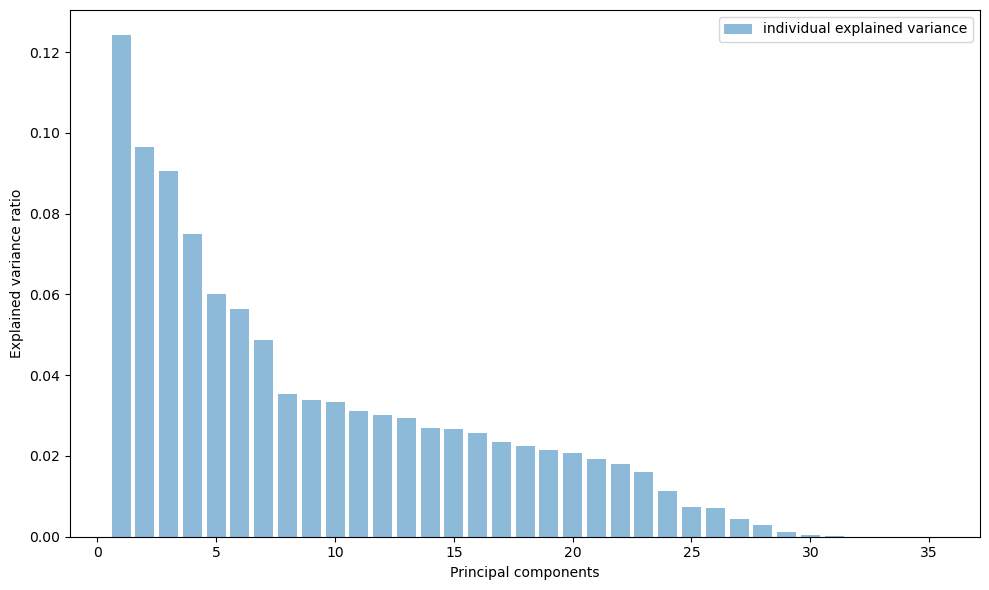

In [198]:
# plot the variance as a function of the number of principal components
plt.figure(figsize=(10, 6))
plt.bar(range(1, 36), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('explained_variance/AUS_WITH_WEATHER_2022_categorical_pca_variance.png')
plt.show()

In [100]:
# X_train_pca_with_labels = np.column_stack((X_train_pca, train_label_reg, train_label_class))
# X_test_pca_with_labels = np.column_stack((X_test_pca, test_label_reg, test_label_class))

# pd.DataFrame(X_train_pca_with_labels).to_csv('pca_data/AUS_WITH_WEATHER_2022_Categorical_X_train_pca.csv', sep=',', encoding='utf-8')
# pd.DataFrame(X_test_pca_with_labels).to_csv('pca_data/AUS_WITH_WEATHER_2022_Categorical_X_test_pca.csv', sep=',', encoding='utf-8')

In [141]:
print(train_label_reg)

58156     43.0
71253     -6.0
26101     -5.0
36504     -5.0
79040     -1.0
         ...  
6265      -1.0
54886      4.0
76820     -3.0
860       -5.0
15795    143.0
Name: DEP_DELAY, Length: 65149, dtype: float64


In [199]:
X_train_pca_df_with_labels = pd.DataFrame(X_train_pca)
X_train_pca_df_with_labels['DEP_DELAY'] = train_label_reg.reset_index().drop('index', axis=1)
X_train_pca_df_with_labels['DEP_DEL15'] = train_label_class.reset_index().drop('index', axis=1)
X_test_pca_df_with_labels = pd.DataFrame(X_test_pca)
X_test_pca_df_with_labels['DEP_DELAY'] = test_label_reg.reset_index().drop('index', axis=1)
X_test_pca_df_with_labels['DEP_DEL15'] = test_label_class.reset_index().drop('index', axis=1)

pd.DataFrame(X_train_pca_df_with_labels).to_csv('pca_data/AUS_WITH_WEATHER_2022_categorical_X_train_pca.csv', sep=',', encoding='utf-8')
pd.DataFrame(X_test_pca_df_with_labels).to_csv('pca_data/AUS_WITH_WEATHER_2022_categorical_X_test_pca.csv', sep=',', encoding='utf-8')